In [162]:
import numpy as np
import csv
import pandas as pd

__IMPORT FILE__

In [163]:
dataset = pd.read_csv ('C:\\Users\\Asus\\1301174038\\used_cars.csv')

__DATA EXPLORATION__

In [164]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 19 columns):
id              20001 non-null int64
region          20001 non-null int64
region_url      20001 non-null int64
price           20001 non-null int64
year            19989 non-null float64
manufacturer    19296 non-null float64
condition       10849 non-null float64
cylinders       12916 non-null float64
fuel            19928 non-null float64
odometer        17612 non-null float64
title_status    19891 non-null float64
transmission    19811 non-null object
drive           15359 non-null float64
size            6886 non-null float64
type            16342 non-null float64
paint_color     14487 non-null float64
state           19989 non-null float64
lat             18970 non-null object
long            18970 non-null object
dtypes: float64(12), int64(4), object(3)
memory usage: 2.9+ MB


In [165]:
# encode to float for searching correlation
dataset['transmission'] = pd.to_numeric(dataset['transmission'], errors='coerce')

__Feature Selection__

In [166]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

__Pearson Correlation Method__

In [167]:
cor = dataset.corr(method='pearson')

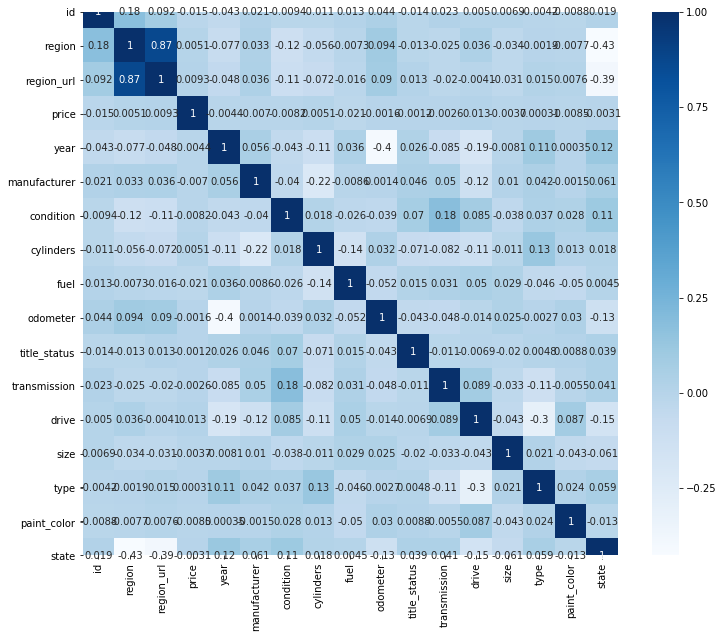

In [168]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [169]:
cor = dataset.corr(method='pearson')
cor

,id,region,region_url,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
id,1.000000,0.177090,0.091567,-0.015290,-0.042850,0.021341,-0.009375,-0.010796,0.013404,0.043957,-0.014229,0.022756,0.004994,0.006933,-0.004192,-0.008802,0.019421
region,0.177090,1.000000,0.870661,0.005084,-0.076869,0.033092,-0.115785,-0.056473,-0.007310,0.094020,-0.013131,-0.025101,0.035954,-0.034327,-0.001862,-0.007707,-0.426662
region_url,0.091567,0.870661,1.000000,0.009286,-0.047948,0.036348,-0.107000,-0.071603,-0.015980,0.089631,0.012731,-0.020189,-0.004052,-0.031131,0.015417,0.007575,-0.385124
price,-0.015290,0.005084,0.009286,1.000000,-0.004382,-0.006973,-0.008156,0.005056,-0.020611,-0.001608,-0.001215,-0.002586,0.012988,-0.003658,0.000309,-0.008541,-0.003111
year,-0.042850,-0.076869,-0.047948,-0.004382,1.000000,0.056210,-0.043297,-0.108486,0.036203,-0.401415,0.025986,-0.085307,-0.185963,-0.008144,0.108242,0.000351,0.123875
manufacturer,0.021341,0.033092,0.036348,-0.006973,0.056210,1.000000,-0.039894,-0.219000,-0.008609,0.001438,0.046337,0.050383,-0.124212,0.010266,0.041951,-0.001472,0.061185
condition,-0.009375,-0.115785,-0.107000,-0.008156,-0.043297,-0.039894,1.000000,0.017600,-0.026208,-0.039345,0.070480,0.182293,0.085444,-0.037882,0.036792,0.027797,0.113031
cylinders,-0.010796,-0.056473,-0.071603,0.005056,-0.108486,-0.219000,0.017600,1.000000,-0.139918,0.031780,-0.070837,-0.082219,-0.110165,-0.010572,0.128677,0.012604,0.018002
fuel,0.013404,-0.007310,-0.015980,-0.020611,0.036203,-0.008609,-0.026208,-0.139918,1.000000,-0.051662,0.014532,0.030706,0.050400,0.028727,-0.045966,-0.049569,0.004533
odometer,0.043957,0.094020,0.089631,-0.001608,-0.401415,0.001438,-0.039345,0.031780,-0.051662,1.000000,-0.043342,-0.048294,-0.014187,0.025195,-0.002672,0.030365,-0.125251


threeshold > 0,05 will be choose

In [170]:
corr_matrix = dataset.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.05)]
to_drop

['region',
 'region_url',
 'year',
 'manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

__DATA PREPROCESSING__

In [171]:
dataset = dataset.drop(columns=(['id','lat','long', 'state', 
                                 'region','region_url', 'title_status',
                                'drive', 'paint_color','state','size']), axis= 1)

encode using Label Encoder because column is categorical 

In [172]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dataset['transmission'] = encoder.fit_transform(dataset['transmission'])

In [173]:
dataset.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type
0,17899,2012.0,38.0,0.0,3.0,2.0,63500.0,3,3.0
1,0,2016.0,12.0,0.0,NaN,2.0,10.0,0,NaN
2,46463,2015.0,13.0,0.0,NaN,2.0,7554.0,0,NaN
3,0,2016.0,12.0,0.0,NaN,2.0,10.0,0,NaN
4,49999,2018.0,12.0,NaN,NaN,0.0,70150.0,0,6.0


In [174]:
dataset.groupby('transmission').count()

,price,year,manufacturer,condition,cylinders,fuel,odometer,type
transmission,,,,,,,,
0,17518,17506,16985,9288,11317,17454,15499,14363
1,1709,1709,1559,1064,1222,1704,1370,1275
2,583,583,563,496,376,582,554,514
3,1,1,1,1,1,1,1,1
4,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...
189,1,1,1,0,0,1,1,1
190,1,1,1,0,0,1,1,1
191,1,1,1,0,0,1,1,1


find missing value

In [175]:
dataset.isnull().sum()

price              0
year              12
manufacturer     705
condition       9152
cylinders       7085
fuel              73
odometer        2389
transmission       0
type            3659
dtype: int64

fill missing value with the attribute mean (Data Cleaning Methods)

In [176]:
dataset.fillna(dataset.mean(), inplace=True)

In [177]:
print(dataset.isnull().sum())

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
dtype: int64


Drop table for label and encode data

In [178]:
data = dataset.drop(columns=(['transmission'])) # drop table for label
data['year'] = data['year'].astype(int)
data['manufacturer'] = data['manufacturer'].astype(int)
data['condition'] = data['condition'].astype(int)
data['cylinders'] = data['cylinders'].astype(int)
data['fuel'] = data['fuel'].astype(int)
data['odometer'] = data['odometer'].astype(int)
data['type'] = data['type'].astype(int)

In [179]:
data.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,type
0,17899,2012,38,0,3,2,63500,3
1,0,2016,12,0,4,2,10,7
2,46463,2015,13,0,4,2,7554,7
3,0,2016,12,0,4,2,10,7
4,49999,2018,12,1,4,0,70150,6


__Quartil Method__

In [180]:
# q1,q2,q3 from each features
price_quartil = [3970, 8795, 17495]
year_quartil = [2007, 2011, 2015]
manufacturer_quartil = [12, 15, 29]
condition_quartil = [0,1.004701,1.004701]
cylinders_quartil = [4.60305,4.60305,5]
fuel_quartil = [2,2,2]
odometer_quartil = [56500, 99164.345446, 127515]
type_quartil = [7,7.217966,8]

In [181]:
# change to array
price = np.asarray(data['price'])
year = np.asarray(data['year'])
manufacturer = np.asarray(data['manufacturer'])
condition = np.asarray(data['condition'])
cylinders = np.asarray(data['cylinders'])
fuel = np.asarray(data['fuel'])
odometer = np.asarray(data['odometer'])
tipe = np.asarray(data['type'])

In [182]:
# change quartil
def change_quartil(temp_v, value):
  for i, val in enumerate(value):
    if val >= temp_v[2]:
      value[i] = int(3)
    elif (val < temp_v[2]) and (val >= temp_v[1]):
      value[i] = int(2)
    elif (val < temp_v[1]) and (val >= temp_v[0]):
      value[i] = int(1)
    elif (val < temp_v[0]):
      value[i] = int(0)
  return value

In [183]:
results_price = change_quartil(price_quartil, price)
results_year = change_quartil(year_quartil, year)
results_man = change_quartil(manufacturer_quartil, manufacturer)
results_con = change_quartil(condition_quartil, condition)
results_cyl = change_quartil(cylinders_quartil, cylinders)
results_fuel = change_quartil(fuel_quartil, fuel)
results_odo = change_quartil(odometer_quartil, odometer)
results_typ = change_quartil(type_quartil, tipe)

In [184]:
data_train = pd.DataFrame()
data_train['price'] = price
data_train['year'] = year
data_train['manufacturer'] = manufacturer
data_train['condition'] = condition
data_train['cylinders'] = cylinders
data_train['fuel'] = fuel
data_train['odometer'] = odometer
data_train['tipe'] = tipe

In [185]:
data_train

,price,year,manufacturer,condition,cylinders,fuel,odometer,tipe
0,3,2,3,1,0,3,1,0
1,0,3,1,1,0,3,0,1
2,3,3,1,1,0,3,0,1
3,0,3,1,1,0,3,0,1
4,3,3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
19996,3,3,3,1,0,0,0,3
19997,2,3,3,1,0,3,0,1
19998,0,3,2,1,3,3,0,3
19999,2,3,3,1,0,3,0,1


In [186]:
# data.to_csv('fitur.csv', index=False)

__CLASSIFICATION__

In [187]:
from sklearn.model_selection import train_test_split

__Split Data__

In [188]:
features = data
label = dataset['transmission']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=0)

In [190]:
# X_train, y_train.to_csv('data train.csv', index=False)

__GAUSSIAN NAIVE BAYES METHOD__

In [191]:
from sklearn.naive_bayes import GaussianNB

In [192]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_NB = gnb.predict(X_test)
y_pred_NB
# X_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

__k-NN METHOD__

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.preprocessing import scale

In [194]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_predKNN = knn.predict(X_test)
y_predKNN

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

__EVALUASI__ using Confusion Matrix

In [195]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [196]:
# GAUSSIAN NB
y_true = y_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[5027   10  232 ...    0    0    1]
 [ 494   12   32 ...    0    0    0]
 [  96    0  103 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Accuracy Score : 0.7789728828965309
Report : 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5755
           1       0.55      0.02      0.04       566
           2       0.28      0.50      0.36       204
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
    

E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [197]:
# k-NN
y_true = y_test
hasil = confusion_matrix(y_true, y_predKNN)
print('Confusion Matrix: ')
print(hasil)
print('Accuracy Score :',accuracy_score(y_true, y_predKNN))
print('Report: ')
print(classification_report(y_test, y_predKNN))

Confusion Matrix: 
[[5437  240   78 ...    0    0    0]
 [ 440  120    6 ...    0    0    0]
 [ 118    9   77 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
Accuracy Score : 0.853507044387214
Report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5755
           1       0.33      0.21      0.26       566
           2       0.48      0.38      0.42       204
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
      

In [159]:
result_class = pd.DataFrame({
    'Actual Result': y_true,
    'Naive Bayes': y_pred_NB,
    'k-NN' : y_predKNN
})

result_class

,Actual Result,Naive Bayes,k-NN
19135,0,0,0
4981,0,0,0
16644,0,0,0
16709,2,0,0
5306,0,0,0
...,...,...,...
19451,1,0,0
17102,0,2,0
14472,1,0,1
13821,1,0,0


In [160]:
result_class['Naive Bayes'].value_counts()

0      5654
2       367
23       50
16       48
49       42
63       42
44       33
135      27
18       25
127      22
1        22
166      19
6        14
111      12
147      12
73       12
104      11
66       10
93       10
56        9
76        9
30        8
160       8
43        7
122       7
8         7
149       7
158       6
121       6
57        5
89        5
180       5
14        5
79        5
54        5
3         5
102       5
75        4
98        4
100       4
35        4
156       3
41        3
74        3
61        3
70        3
58        3
50        3
22        2
19        2
77        2
113       2
59        2
21        2
28        1
87        1
177       1
39        1
37        1
191       1
Name: Naive Bayes, dtype: int64

In [161]:
result_class['k-NN'].value_counts()

0    6071
1     369
2     161
Name: k-NN, dtype: int64